In [104]:
import pandas as pd
import csv
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv('https://goz39a.s3.eu-central-1.amazonaws.com/911_ny.csv')
df.head()

,personA,personB,strength,verification
0,Hani Hanjour,Majed Moqed,5,1
1,Hani Hanjour,Nawaf Alhazmi,5,1
2,Hani Hanjour,Khalid Al-Mihdhar,5,1
3,Hani Hanjour,Lotfi Raissi,5,1
4,Hani Hanjour,Bandar Alhazmi,5,1


The first two columns denote the persons who are connected and the following two numbers signify the strength of the connection(5=strong connection, 1=weak connection); and the last column denotes level to which the connection has been verified by the government officials (1 = confirmed, 3 = possible and unconfirmed connections ). 

In [113]:
G=nx.Graph()
for i in df.index:
    edge = df.iloc[i,]
    G.add_edge(edge['personA'],edge['personB'],weight=edge['strength'],conf=edge['verification'])
    

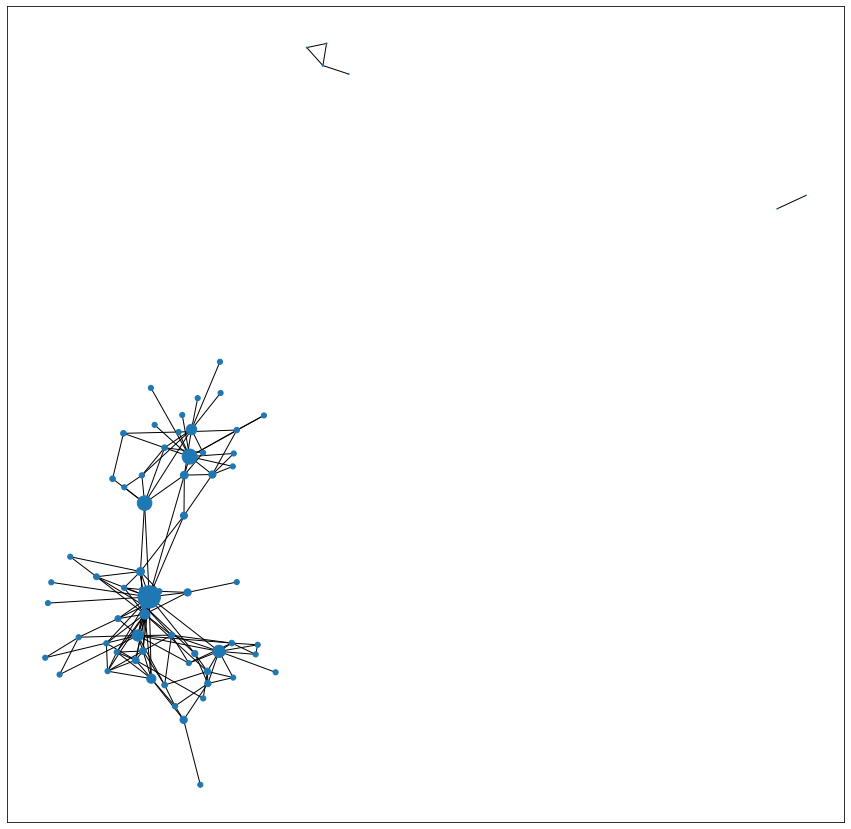

In [114]:
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_size =  [v * 1000 for v in betCent.values()]
#width = [w for w in ]
pos = nx.spring_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G, 
                 pos=pos, 
                 with_labels=False,
                 node_size=node_size)

In [115]:
df_betweenness = pd.DataFrame.from_dict(betCent,orient='index')
df_betweenness.columns=['betweenness']
df_betweenness.sort_values(by='betweenness',ascending=False,inplace=True)
df_betweenness.head()

,betweenness
Mohamed Atta,0.498271
Essid Sami Ben Khemais,0.226971
Zacarias Moussaoui,0.211651
Nawaf Alhazmi,0.149011
Hani Hanjour,0.126070


Draw the graph in bits and piecs

In [109]:
important_nodes = df_betweenness.head(10).index.values
top_tree = important_nodes[0:3]
other_nodes = important_nodes[3:-1]

In [111]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] >= 5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if (d["weight"] <= 5 and d['weight']>1)]

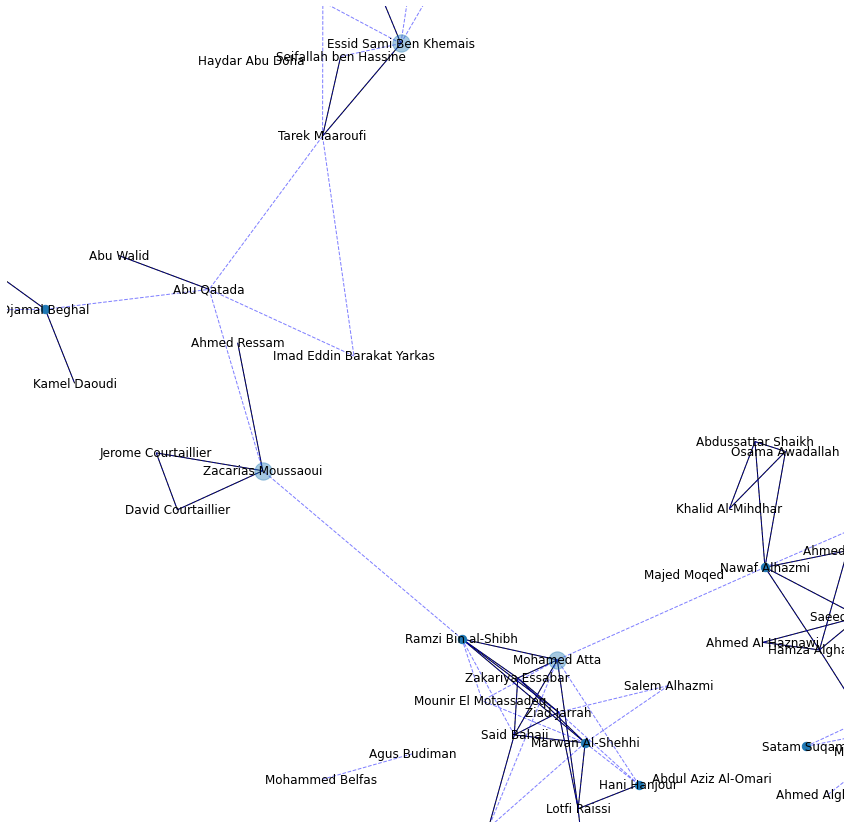

In [118]:
pos = nx.spring_layout(G)  # positions for all nodes
plt.figure(figsize=(15,15))
# nodes
nx.draw_networkx_nodes(G, 
                       nodelist=top_tree,
                       pos=pos, 
                       alpha=0.4,
                       node_size=300)

nx.draw_networkx_nodes(G, 
                       nodelist=other_nodes,
                       pos=pos, node_size=70)

# edges
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=elarge, 
                       width=1)
nx.draw_networkx_edges(G, 
                       pos=pos, 
                       edgelist=esmall, 
                       width=1, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, 
                        pos=pos)

plt.axis("off")
plt.show()